## Domaine fréquentiel
Pyramides Gaussienne, Laplacien et filtre fréquentiel

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import gaussian
from skimage.transform import resize
from scipy import signal

## Exercice 1
Créer une fonction qui construit une pyramide gaussianne de **n** niveaux pour **img**.
> Pour les échantillonages, vous pouvez utiliser `skimage.transform.resize` ou faire des bonds sur les index comme vu précédamment (ex: `::2`)

In [4]:
def sous_echantillonnage(img):
    img = img[::2, ::2]
    img = gaussian(img, sigma=1)
    return img

def pyramide_gaussienne(img, n=5):
    pyramide = [img]
    
    for i in range(n - 1):
        img = sous_echantillonnage(img)
        pyramide.append(img)
    
    return pyramide

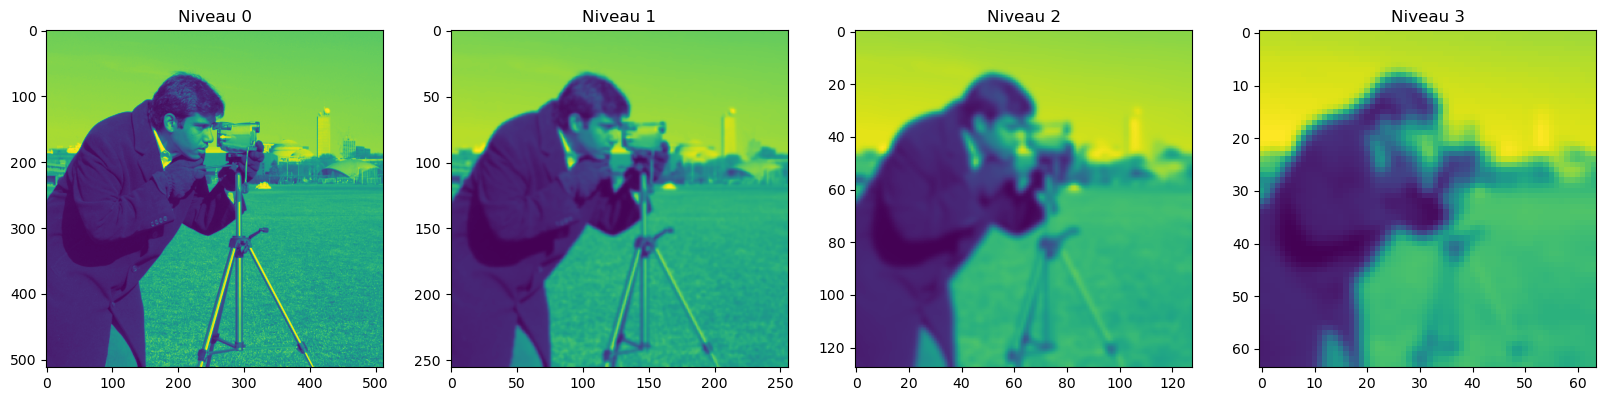

In [5]:
# Testez votre fonction ici
img = data.camera()
n = 4
p_gaussienne = pyramide_gaussienne(img, n)

plt.figure(figsize=(20,20))
plot = 100 + n * 10

for i in range(n):
    plot += 1
    plt.subplot(plot)
    plt.imshow(p_gaussienne[i])
    plt.title('Niveau ' + str(i))
    
plt.show()

## Exercice 2
Créer une fonction qui construit une pyramide laplacienne de **n** niveaux pour **img**.
> Je vous recommende d'utiliser votre implémentation de la pyramide gaussienne pour sauver du temps.

In [19]:
def pyramide_laplacienne(img, n=5):
    pyramide = []
    
    for i in range(n - 1):
        plt.subplot(131)
        plt.imshow(img)
        plt.title('Image originale')

        blur = gaussian(img, sigma=1)
        plt.subplot(132)
        plt.imshow(blur)
        plt.title('Image floutée')

        diff = img - blur
        plt.subplot(133)
        plt.imshow(diff)
        plt.title('Image de différence')
        plt.show()

        pyramide.append(diff)
        img = blur[::2, ::2]
    
    pyramide.append(img)
    return pyramide

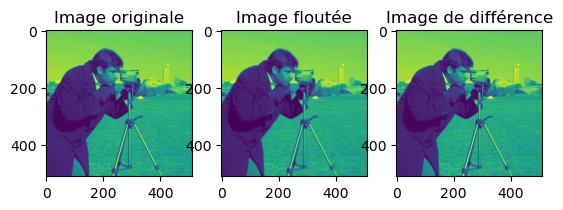

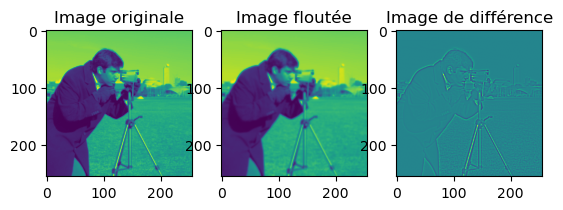

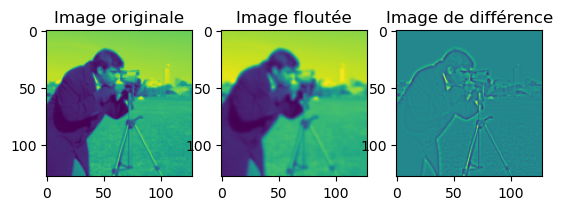

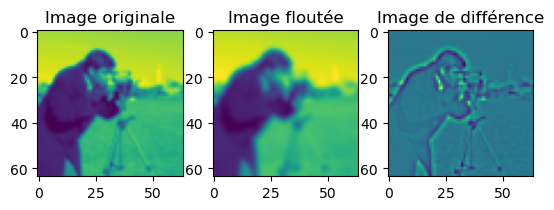

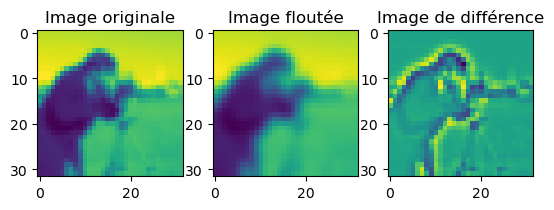

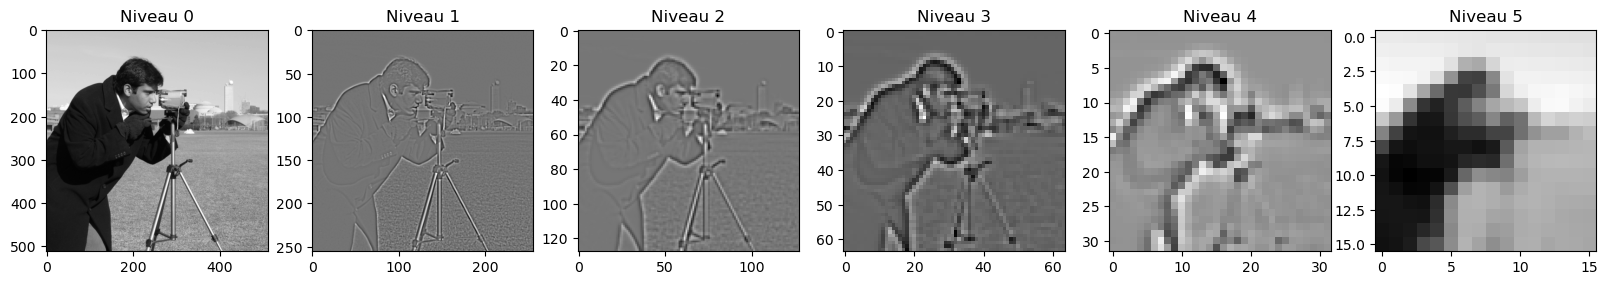

In [23]:
# Testez votre fonction ici
n = 6
img = data.camera()
p_laplacienne = pyramide_laplacienne(img, n)

plt.figure(figsize=(20,20))
plot = 100 + n * 10

for i in range(n):
    plot += 1
    plt.subplot(plot)
    plt.imshow(p_laplacienne[i], cmap='gray')
    plt.title('Niveau ' + str(i))

In [27]:
def reconstruction_laplacienne(imgs : list[np.ndarray]):
    count = len(imgs)

    for i in range(count - 1, 0, -1):
        img = imgs[i]
        shape = imgs[i - 1].shape
        resized = resize(img, shape)
        restored = resized + imgs[i - 1]
        imgs[i - 1] = restored

    return restored


Ceci fait telle affaire

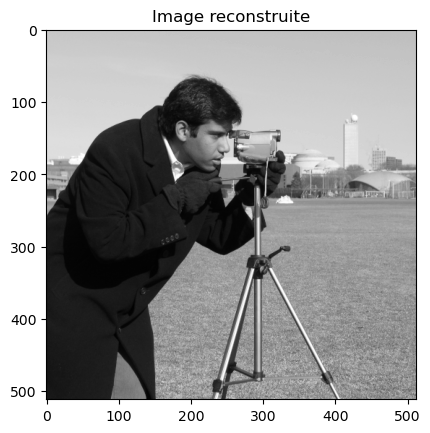

In [28]:
restored = reconstruction_laplacienne(p_laplacienne)
plt.imshow(restored, cmap='gray')
plt.title('Image reconstruite')
plt.show()

## Exercice 3
Appliquer ce filtre gaussien **filter_2D** sur **img** aux numéros précédants dans le domaine fréquentiel.
> **Rappel:** une convolution dans le domaine fréquentiel est équivalent à une multiplication dans le domaine fréquentiel.

/var/folders/z6/j77wj4gd23z2r8q9fp9qh1xc0000gn/T/ipykernel_82114/3361896847.py:5: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  filter_1D = signal.gaussian(2 * hs + 1, 5)


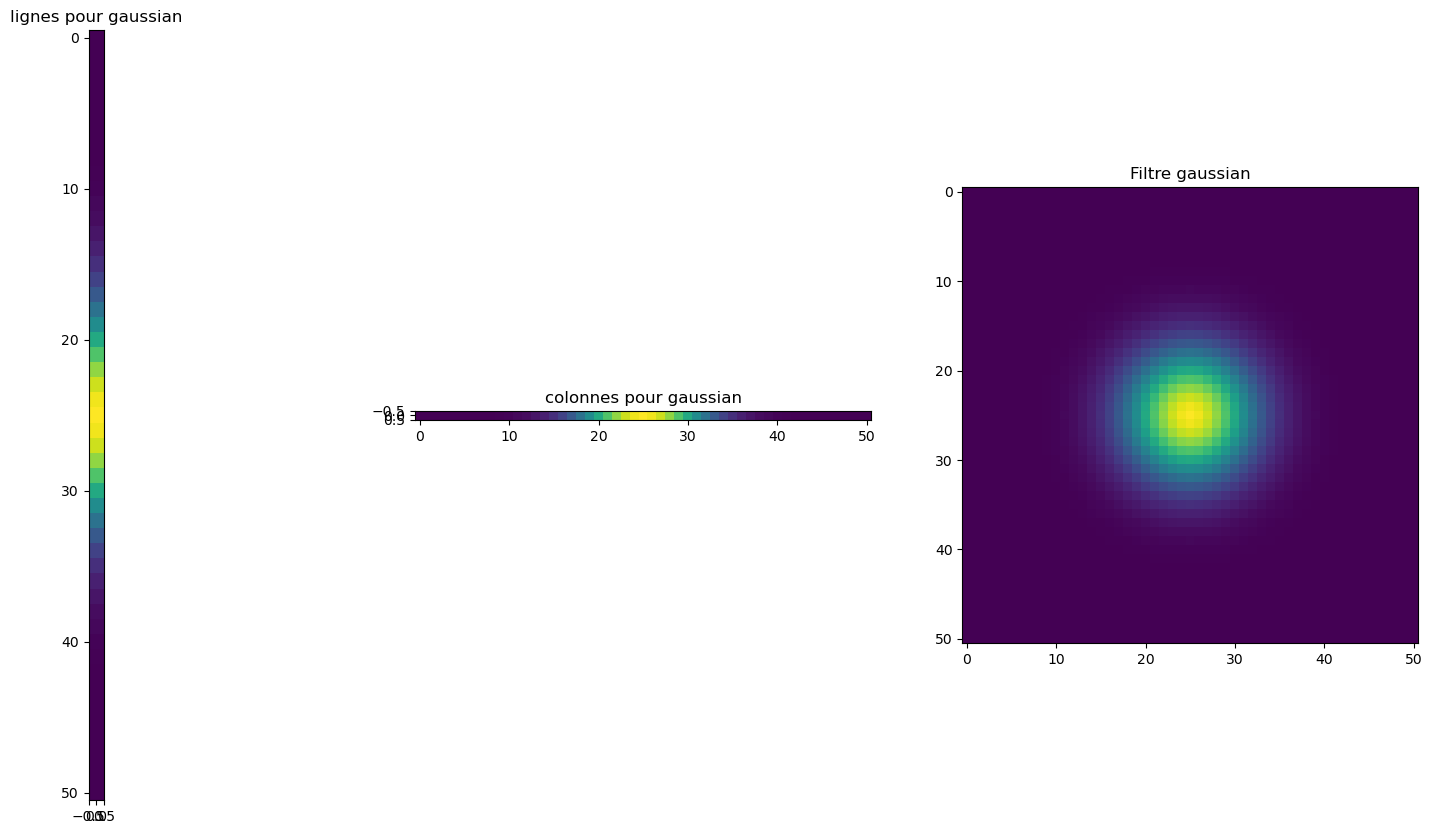

In [25]:
# Création du filtre
plt.figure(figsize=(20,10))

hs = 25
filter_1D = signal.gaussian(2 * hs + 1, 5)

plt.subplot(131)
filter_line = filter_1D.reshape((2 * hs + 1, 1))
plt.imshow(filter_line); plt.title('lignes pour gaussian')

plt.subplot(132)
filter_column = filter_1D.reshape((1, 2 * hs + 1))
plt.imshow(filter_column); plt.title('colonnes pour gaussian')

plt.subplot(133)
filter_2D = filter_line * filter_column
plt.imshow(filter_2D); plt.title('Filtre gaussian')

plt.show()

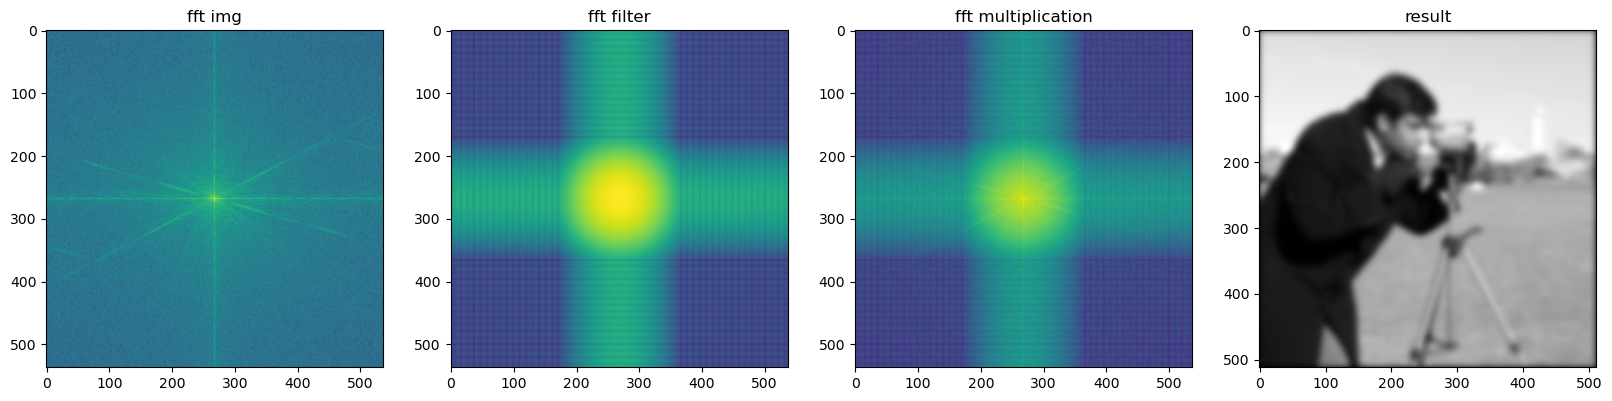

In [26]:
plt.figure(figsize=(20,20))

fftsize = np.array(img.shape) + hs

# fft img
plt.subplot(141)
img_fft = np.fft.fft2(img, fftsize)
plt.imshow(np.log(np.abs(np.fft.fftshift(img_fft))))
plt.title('fft img')

# fft filter
plt.subplot(142)
filter_fft = np.fft.fft2(filter_2D, fftsize)
plt.imshow(np.log(np.abs(np.fft.fftshift(filter_fft))))
plt.title('fft filter')

# fft multiplication
plt.subplot(143)
filtered_fft = img_fft * filter_fft
plt.imshow(np.log(np.abs(np.fft.fftshift(filtered_fft))))
plt.title('fft multiplication')

# ifft result
plt.subplot(144)
result = np.fft.ifft2(filtered_fft).real[hs:, hs:]
plt.imshow(result, cmap='gray')
plt.title('result')


plt.show()